In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#Read data
data = pd.read_csv('WHR2023.csv')

#Numbers of columns and rows
data.shape

(137, 19)

In [54]:
data.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [55]:
#Renaming columns
data = data.rename(columns={
    'Country name' : 'Country Name',
    'Ladder score' : 'Ladder Score',
    'Standard error of ladder score': 'Standard Error of Ladder Score',
    'upperwhisker' : 'Upperwhisker',
    'lowerwhisker' : 'Lowerwhisker',
    'Logged GDP per capita' : 'Logged GDP per Capita',
    'Social support' : 'Social Support',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Freedom to make life choices' : 'Freedom to Make Life Choices',
    'Perceptions of corruption' : 'Perceptions of Corruption',
    'Ladder score in Dystopia' : 'Ladder Score in Dystopia',
    'Dystopia + residual' : 'Dystopia + Residual',
    })


In [56]:
#Dropping unnecessary columns
data.drop(['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
           'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1, inplace=True)
data

,Country Name,Ladder Score,Standard Error of Ladder Score,Upperwhisker,Lowerwhisker,Logged GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Ladder Score in Dystopia,Dystopia + Residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,-0.110


In [57]:
#Data Describe
data.describe()

,Ladder Score,Standard Error of Ladder Score,Upperwhisker,Lowerwhisker,Logged GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Ladder Score in Dystopia,Dystopia + Residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.955000


In [58]:
data.count()

Country Name                      137
Ladder Score                      137
Standard Error of Ladder Score    137
Upperwhisker                      137
Lowerwhisker                      137
Logged GDP per Capita             137
Social Support                    137
Healthy Life Expectancy           136
Freedom to Make Life Choices      137
Generosity                        137
Perceptions of Corruption         137
Ladder Score in Dystopia          137
Dystopia + Residual               136
dtype: int64

In [59]:
data.dtypes

Country Name                       object
Ladder Score                      float64
Standard Error of Ladder Score    float64
Upperwhisker                      float64
Lowerwhisker                      float64
Logged GDP per Capita             float64
Social Support                    float64
Healthy Life Expectancy           float64
Freedom to Make Life Choices      float64
Generosity                        float64
Perceptions of Corruption         float64
Ladder Score in Dystopia          float64
Dystopia + Residual               float64
dtype: object

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    137 non-null    object 
 1   Ladder Score                    137 non-null    float64
 2   Standard Error of Ladder Score  137 non-null    float64
 3   Upperwhisker                    137 non-null    float64
 4   Lowerwhisker                    137 non-null    float64
 5   Logged GDP per Capita           137 non-null    float64
 6   Social Support                  137 non-null    float64
 7   Healthy Life Expectancy         136 non-null    float64
 8   Freedom to Make Life Choices    137 non-null    float64
 9   Generosity                      137 non-null    float64
 10  Perceptions of Corruption       137 non-null    float64
 11  Ladder Score in Dystopia        137 non-null    float64
 12  Dystopia + Residual             136 

In [61]:
data.isnull().sum()

Country Name                      0
Ladder Score                      0
Standard Error of Ladder Score    0
Upperwhisker                      0
Lowerwhisker                      0
Logged GDP per Capita             0
Social Support                    0
Healthy Life Expectancy           1
Freedom to Make Life Choices      0
Generosity                        0
Perceptions of Corruption         0
Ladder Score in Dystopia          0
Dystopia + Residual               1
dtype: int64

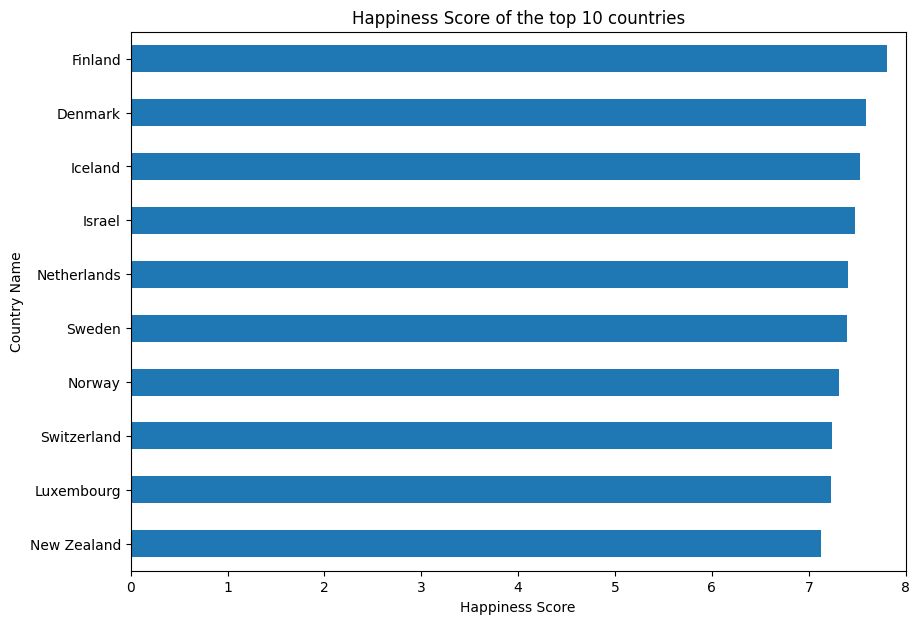

In [62]:
data_plot = data.set_index('Country Name')
data_plot = data_plot[0:10]['Ladder Score']

fig, ax = plt.subplots(figsize = (10,7))                               # Plot sizes
bar_plot = data_plot.plot.barh()                                       # Horizontal bar plot "barh"
bar_plot.set_title('Happiness Score of the top 10 countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()                                                # The biggest to smallest
plt.xlim(0,8)                                                          # change x-axis limits

plt.show()